### Plot center of defects 

To have such images is helpful for manual annotation of bboxes and for data analysis

In [126]:
from pathlib import Path
import pandas as pd
import shutil
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [127]:
df_path = './df_pipe_paths.csv'

source_root = Path('/home/ezhur/datasets/projects/hakaton_pipes/dataset_namings/imgs')
dest_root = Path('/home/ezhur/datasets/projects/hakaton_pipes/dataset_namings/imgs_with_marks/')

IMG_HEIGHT = 600
IMG_WIDTH = 960

In [128]:
# read df
df = pd.read_csv(df_path)
df

,path,x,y,class,new_path
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg
1,0/1538/frame0006.bmp,601.0,299.0,0.0,1.jpg
2,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg
3,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg
4,0/1538/frame0007.bmp,445.0,300.0,0.0,2.jpg
...,...,...,...,...,...
34539,2020.10.25/3_495.bmp,NaN,NaN,NaN,8703_no_def.jpg
34540,0/414/frame0003.bmp,NaN,NaN,NaN,8704_no_def.jpg
34541,0/2070/frame0000.bmp,NaN,NaN,NaN,8705_no_def.jpg
34542,0/mv_1/frame0011.bmp,NaN,NaN,NaN,8706_no_def.jpg


#### Visualization

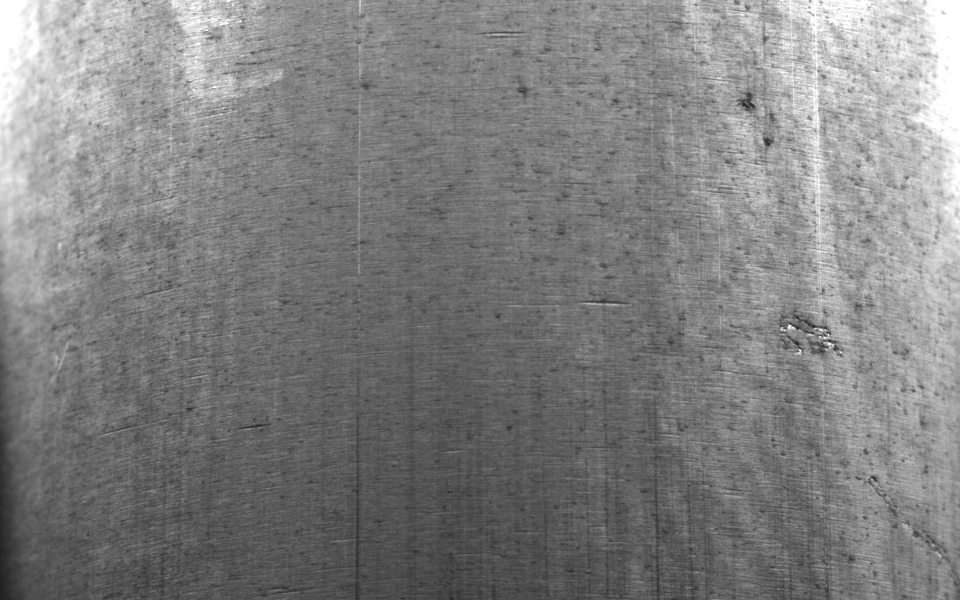

In [130]:
# open image
img_name = '1.jpg'
img_path = source_root / img_name
img = Image.open(img_path)

img

In [131]:
df

,path,x,y,class,new_path
0,0/1538/frame0006.bmp,809.0,336.0,3.0,1.jpg
1,0/1538/frame0006.bmp,601.0,299.0,0.0,1.jpg
2,0/1538/frame0007.bmp,667.0,318.0,3.0,2.jpg
3,0/1538/frame0007.bmp,811.0,523.0,3.0,2.jpg
4,0/1538/frame0007.bmp,445.0,300.0,0.0,2.jpg
...,...,...,...,...,...
34539,2020.10.25/3_495.bmp,NaN,NaN,NaN,8703_no_def.jpg
34540,0/414/frame0003.bmp,NaN,NaN,NaN,8704_no_def.jpg
34541,0/2070/frame0000.bmp,NaN,NaN,NaN,8705_no_def.jpg
34542,0/mv_1/frame0011.bmp,NaN,NaN,NaN,8706_no_def.jpg


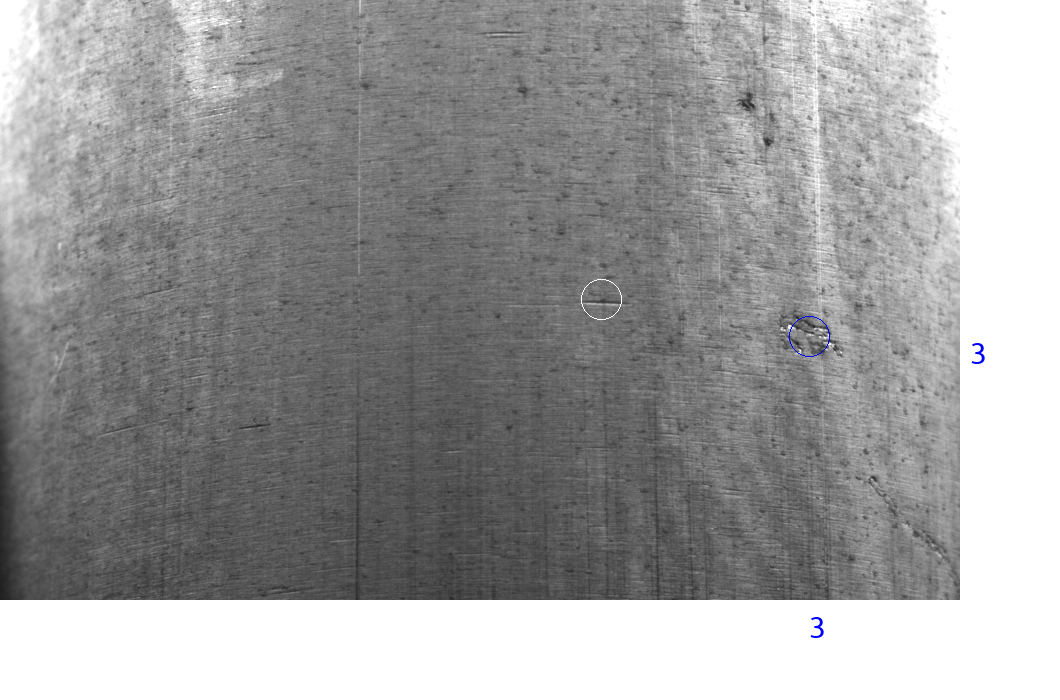

In [133]:
def get_marked_img(df, img_name):
    # paste img on a white background
    bgd_img = Image.new('RGB', (IMG_WIDTH+100, IMG_HEIGHT+100), (255, 255, 255))
    bgd_img.paste(img, (0, 0)) 

    # find bboxes corresponding to given image
    df_slice = df[df['new_path'] == img_name]

    draw = ImageDraw.Draw(bgd_img)

    # draw marks on image
    # font = ImageFont.truetype("arial.ttf", 16
    font = ImageFont.truetype("Ubuntu-R.ttf", 30)
    for index, row in df_slice.iterrows():
        x = row['x']
        y = row['y']
        cl = row['class']
        if np.isnan(x):
            continue
        if cl == 0: # no defect
            draw.ellipse((x-20, y-20, x+20, y+20), outline ='white')
        else:
            draw.ellipse((x-20, y-20, x+20, y+20), outline ='blue')
            draw.text((x, IMG_HEIGHT+10), str(int(cl)), fill="blue", font=font) 
            draw.text((IMG_WIDTH+10, y), str(int(cl)), fill="blue", font=font) 
    return bgd_img

bgd_img = get_marked_img(df, img_name)
bgd_img

#### Save marked images

In [134]:
for img_path in source_root.iterdir():
    img_name = img_path.name
    img = Image.open(img_path)

    bgd_img = get_marked_img(df, img_name)
    bgd_img.save(dest_root / (img_name[:-4]+'_marked.jpg'))